In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, context='notebook')

In [3]:
def show_mccv_result(results, var_name, split_str, save_name, ylabel='F1-Score', xlabel='Repitition', ylim=(0, 1), bar_color='#3E4E50'):

    results = results.reset_index()

    max_score = results[var_name].max()
    min_score = results[var_name].min()
    mean_score = results[var_name].mean()
    std_score = results[var_name].std()

    fig, ax = plt.subplots()
    g = sns.barplot(results, x='index', y=var_name, color=bar_color, ax=ax)
    g.set_xticks(np.arange(len(results), step=5))
    g.set_ylabel(ylabel)
    g.set_xlabel(xlabel)
    g.set_ylim(ylim)

    plt.axhline(y=max_score, color='#F8BD7F', linestyle='--')
    plt.axhline(y=min_score, color='#F8BD7F', linestyle='--')
    plt.axhspan(ymin=min_score, ymax=max_score, color='#FACFAD', alpha=0.2)

    textstr = '\n'.join((
        f'{split_str} Train-Test Split',
        f'Avg. {ylabel}$={mean_score:.2f}(\pm{std_score:.2f})$'
    ))

    props = dict(boxstyle='square', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.savefig(save_name, bbox_inches='tight', dpi=150)
    plt.show()

In [4]:
def mccv(test_size, num_repeats=20, random_state=42):
    # set up data 
    iris = load_iris()
    X, y = iris.data[:, :], iris.target

    # set up KNN
    clf = KNeighborsClassifier(n_neighbors=3,
                                weights='uniform', 
                                algorithm='kd_tree', 
                                leaf_size=30, 
                                p=2, 
                                metric='minkowski', 
                                metric_params=None, 
                                n_jobs=1)

    # set up mccv
    rng = np.random.default_rng(random_state)
    seeds = np.arange(10**4)
    rng.shuffle(seeds)
    seeds = seeds[:num_repeats]

    # perform mccv 
    all_res = []
    for idx, seed in enumerate(seeds):
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                test_size=test_size, 
                                                                random_state=seed,
                                                                # stratify=y
                                                                )
        y_pred_i = clf.fit(X_train, y_train).predict(X_test)
        f1 = f1_score(y_test, y_pred_i, average='micro')
        acc = accuracy_score(y_test, y_pred_i)

        all_res.append(pd.DataFrame({'F1-Score': f1, 'Accuracy': acc}, index=[idx]))

    all_res = pd.concat(all_res, axis=0)
    return all_res


### Monte Carlo Cross-Validation with KNN-Classifier on Iris

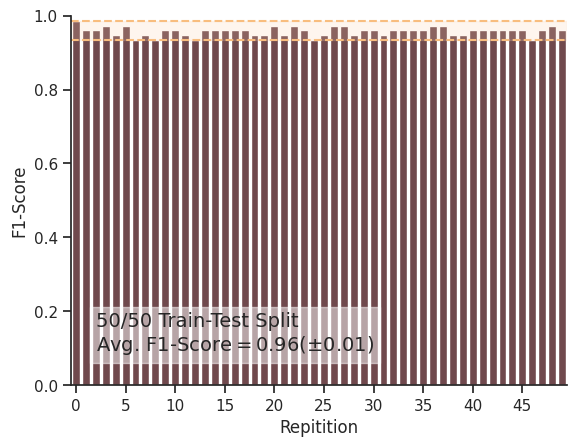

In [6]:
# set up MCCV
random_state = 12345
num_reapeats = 50
test_size = 0.5

# perform mccv 
res1 = mccv(test_size, num_reapeats, random_state)

# show and save plot
show_mccv_result(res1, var_name='F1-Score', split_str='50/50', save_name='./plots/IRIS_50_50.jpg', bar_color='#764248')

In [7]:
# show_mccv_result(res1, var_name='Accuracy', ylabel='Accuracy', split_str='50/50', save_name='./plots/IRIS_50_50_ACC.jpg', bar_color='#764248')

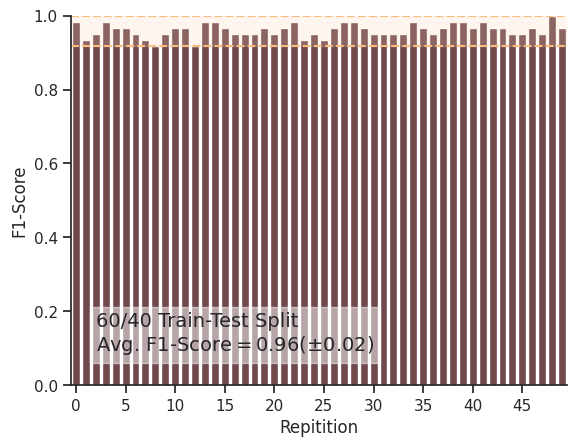

In [8]:
# set up MCCV
random_state = 12345
num_reapeats = 50
test_size = 0.4

# perform mccv 
res1 = mccv(test_size, num_reapeats, random_state)

# show and save plot
show_mccv_result(res1, var_name='F1-Score', split_str='60/40', save_name='./plots/IRIS_60_40.jpg', bar_color='#764248')

In [9]:
# show_mccv_result(res1, var_name='Accuracy', ylabel='Accuracy', split_str='60/40', save_name='./plots/IRIS_60_40_ACC.jpg', bar_color='#764248')

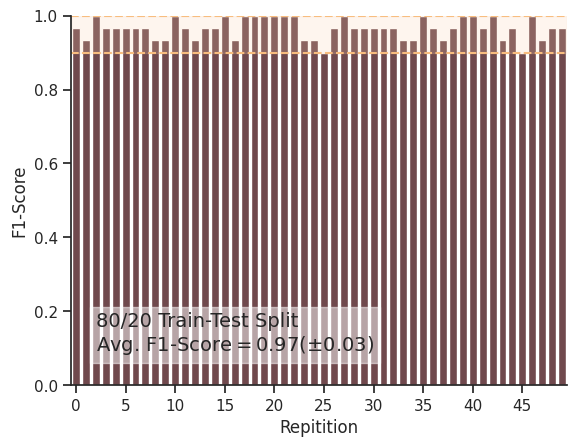

In [10]:
# set up MCCV
random_state = 12345
num_reapeats = 50
test_size = 0.2

# perform mccv 
res1 = mccv(test_size, num_reapeats, random_state)

# show and save plot
show_mccv_result(res1, var_name='F1-Score', split_str='80/20', save_name='./plots/IRIS_80_20.jpg', bar_color='#764248')

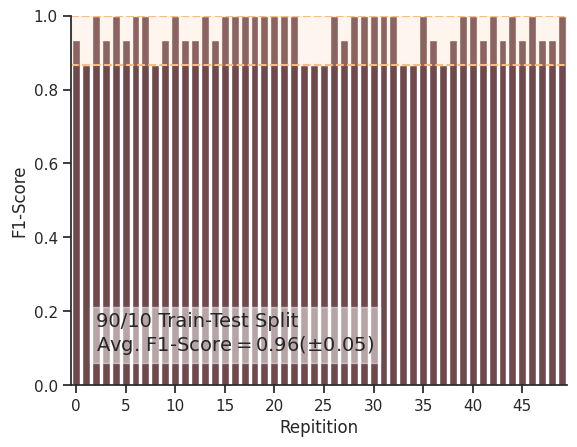

In [11]:
# set up MCCV
random_state = 12345
num_reapeats = 50
test_size = 0.1

# perform mccv 
res1 = mccv(test_size, num_reapeats, random_state)

# show and save plot
show_mccv_result(res1, var_name='F1-Score', split_str='90/10', save_name='./plots/IRIS_90_10.jpg', bar_color='#764248')

In [12]:
# show_mccv_result(res1, var_name='Accuracy', ylabel='Accuracy', split_str='90/10', save_name='./plots/IRIS_90_10_ACC.jpg', bar_color='#764248')

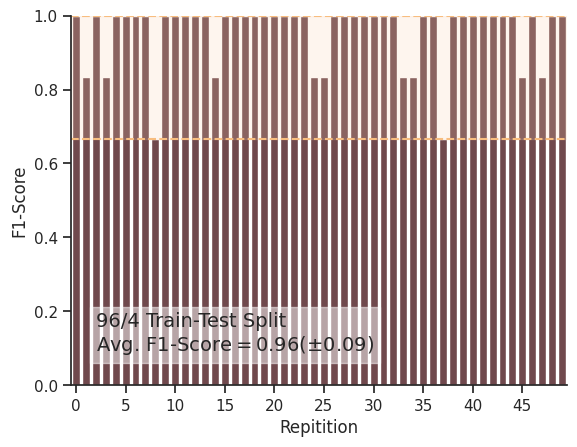

In [13]:
# set up MCCV
random_state = 12345
num_reapeats = 50
test_size = 0.04

# perform mccv 
res1 = mccv(test_size, num_reapeats, random_state)

# show and save plot
show_mccv_result(res1, var_name='F1-Score', split_str='96/4', save_name='./plots/IRIS_96_04.jpg', bar_color='#764248')